In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from sklearn.metrics import mean_squared_error
from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')

Lets start by data exploratory

We need to get some useful information and understanding about dataset first.

In [2]:
# load in dataset
data = pd.read_csv("bike.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
data.info() # get the detail info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Since some of the column's data types are in the wrong format,

we will change it accrodingly and drop some unnecessary column for

feature engineering later.

In [3]:
# transform data types for feature engineering later
data['holiday']=data['holiday'].astype(str)
data['weekday']=data['weekday'].astype(str)
data['workingday']=data['workingday'].astype(str)
data['weathersit']=data['weathersit'].astype(str)
data['dteday']=pd.to_datetime(data['dteday'])
data['season']=data['season'].astype(str)
data['yr']=data['yr'].astype(str)
data['mnth']=data['mnth'].astype(str)
print(data.dtypes)

instant                int64
dteday        datetime64[ns]
season                object
yr                    object
mnth                  object
holiday               object
weekday               object
workingday            object
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [4]:
data.drop(columns = "instant", inplace = True)
data.reset_index(inplace = True, drop = True)
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Next, we will handle the missing values aka the nan values in each of the column

In [5]:
data.isnull().any() # no transformation needed since no missing values

dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

The dataset contains no missing values, hence we will proceed to next.

Lets plot some graph to visualize the dataset and hepefully

we can get some useful information and analysis out of it.

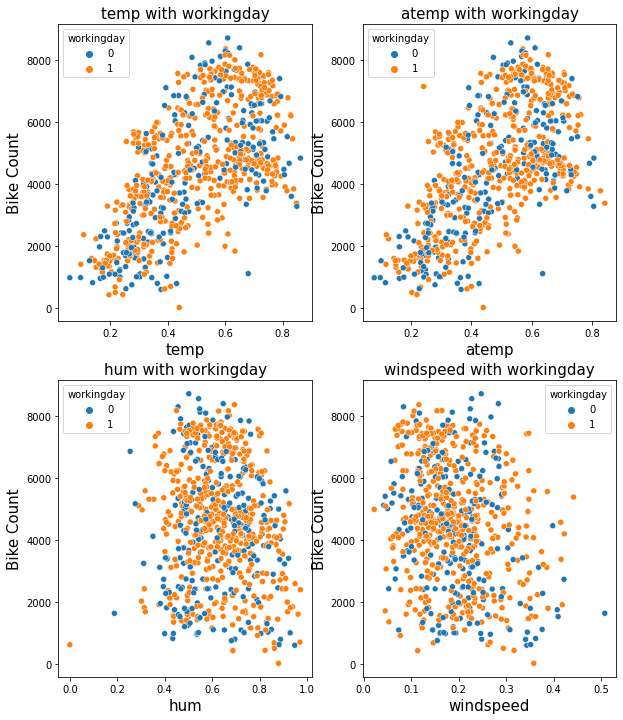

In [6]:
# Let see how windspeed, temp, atemp, and hum with workingday affect the bike count
features = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize = (10,12))    
    
for index, feature in enumerate(features):
    plt.subplot(2,2, index+1)
    plt.title(feature + ' with workingday', fontsize = 15)
    plt.ylabel("Bike Count", fontsize = 15)
    plt.xlabel(feature, fontsize = 15)
    sns.scatterplot(x = feature, y = "cnt", data = data, hue = "workingday")
plt.show()

Lets check the skewness of the continous variable columns

We can do it by peforming distribution plot to find out the skewness.

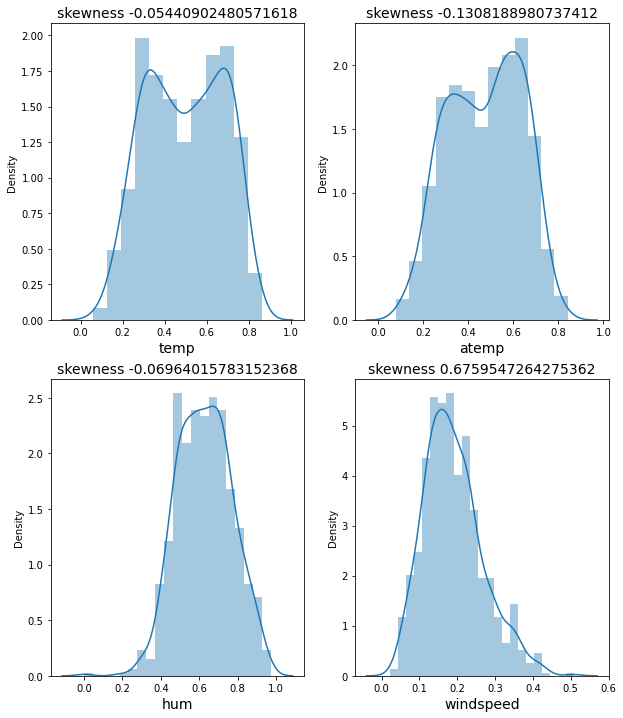

In [7]:
# Let check the skewness of each continous feature
features = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize = (10,12))    
    
for index, feature in enumerate(features):
    plt.subplot(2,2, index+1)
    plt.title("skewness {}".format(skew(data[feature])), fontsize = 14)
    plt.xlabel(feature, fontsize = 14)
    sns.distplot(data[feature])
plt.show()

As the graph shown above, column with name atemp and windspeed are not

well distributed hence we try normalize and deskew them.

Text(0.5, 0, 'Windspeed')

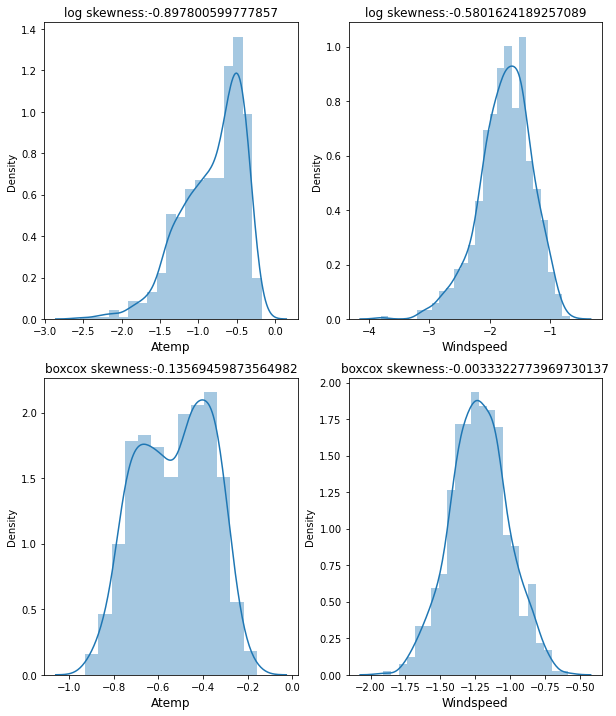

In [8]:
# apply logs transformation and boxcox on feature that has high positive and 
# high negative skewness
high_skewness_feature = ["atemp", "windspeed"]

atemp_log = np.log(data[high_skewness_feature[0]])
windspeed_log = np.log(data[high_skewness_feature[1]])
atemp_boxcox = stats.boxcox(data[high_skewness_feature[0]])[0]
windspeed_boxcox = stats.boxcox(data[high_skewness_feature[1]])[0]

# check the distribution and skewness again
fig = plt.figure(figsize = (10,12))
fig.add_subplot(2, 2, 1)
plt.title("log skewness:{}".format(skew(atemp_log)))
sns.distplot(atemp_log)
plt.xlabel("Atemp", fontsize = 12)

fig.add_subplot(2, 2, 2)
plt.title("log skewness:{}".format(skew(windspeed_log)))
sns.distplot(windspeed_log)
plt.xlabel("Windspeed", fontsize = 12)
             
fig.add_subplot(2, 2, 3)
plt.title("boxcox skewness:{}".format(skew(atemp_boxcox)))
sns.distplot(atemp_boxcox)
plt.xlabel("Atemp", fontsize = 12)

fig.add_subplot(2, 2, 4)
plt.title("boxcox skewness:{}".format(skew(windspeed_boxcox)))
sns.distplot(windspeed_boxcox)
plt.xlabel("Windspeed", fontsize = 12)

The boxcox transformation is performing well in this case hence we will adapt

it in our dataset and transform the data.

In [9]:
# append boxcox transformation since it reduces the skewness is doing better
data["atemp"] = atemp_boxcox
data["windspeed"] = windspeed_boxcox
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,-0.638644,0.805833,-1.281247,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,-0.648616,0.696087,-1.056940,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,-0.814787,0.437273,-1.057459,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,-0.791760,0.590435,-1.281684,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,-0.774393,0.436957,-1.207615,82,1518,1600


In [10]:
obj_cols = data.select_dtypes("object")
obj_cols.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,1,0,1,0,6,0,2
1,1,0,1,0,0,0,2
2,1,0,1,0,1,1,1
3,1,0,1,0,2,1,1
4,1,0,1,0,3,1,1


Next we can perform feature selection. We can filter out the columns

that has nothing to do with our prediction or more precisely, contribute the least.

In [11]:
# ANOVA test for feature selection
fail_hypo_cols = []
for x in obj_cols.columns:
    model = ols('cnt' + '~' + x, data = data).fit() 
    result_anova = sm.stats.anova_lm(model)
    if result_anova["PR(>F)"][0] > 0.05:
        fail_hypo_cols.append(result_anova.index[0])
    print(result_anova)
print("\nDesired cols that failed to reject null hypyothesis (less than 0.05 p-values) : {}".
      format(fail_hypo_cols))

             df        sum_sq       mean_sq           F        PR(>F)
season      3.0  9.505959e+08  3.168653e+08  128.769622  6.720391e-67
Residual  727.0  1.788940e+09  2.460715e+06         NaN           NaN
             df        sum_sq       mean_sq           F        PR(>F)
yr          1.0  8.798289e+08  8.798289e+08  344.890586  2.483540e-63
Residual  729.0  1.859706e+09  2.551038e+06         NaN           NaN
             df        sum_sq       mean_sq          F        PR(>F)
mnth       11.0  1.070192e+09  9.729021e+07  41.903703  4.251077e-70
Residual  719.0  1.669343e+09  2.321757e+06        NaN           NaN
             df        sum_sq       mean_sq         F    PR(>F)
holiday     1.0  1.279749e+07  1.279749e+07  3.421441  0.064759
Residual  729.0  2.726738e+09  3.740381e+06       NaN       NaN
             df        sum_sq       mean_sq         F    PR(>F)
weekday     6.0  1.765902e+07  2.943170e+06  0.782862  0.583494
Residual  724.0  2.721876e+09  3.759498e+06       NaN

  As the ANOVA test outcome shown above, holiday, weekday, and working day 
  
  have the p-value than larger than .05 which fail to reject the hypothesis so we
  
  will remove them.

In [12]:
# eliminate feature that fail to reject hypothesis
data.drop(columns = fail_hypo_cols, inplace = True)
data.head()

,dteday,season,yr,mnth,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,2,0.344167,-0.638644,0.805833,-1.281247,331,654,985
1,2011-01-02,1,0,1,2,0.363478,-0.648616,0.696087,-1.056940,131,670,801
2,2011-01-03,1,0,1,1,0.196364,-0.814787,0.437273,-1.057459,120,1229,1349
3,2011-01-04,1,0,1,1,0.200000,-0.791760,0.590435,-1.281684,108,1454,1562
4,2011-01-05,1,0,1,1,0.226957,-0.774393,0.436957,-1.207615,82,1518,1600


In [13]:
y = data.pop("cnt") # get prediction target
print("max count :{}, min count :{}".format(y.max(),y.min()))

max count :8714, min count :22


Convert our y column into three categories, 0,1,2

0 - low rental count

1 - moderate rental count

2 - high rental count

In [14]:
max_count = y.max()
# transform y into scaled value
y = y.map(lambda x: 0 if x < max_count*0.3 else(
          1 if x >= max_count*0.31 and x <= max_count*0.6 else 2))
y.head()

0    0
1    0
2    0
3    0
4    0
Name: cnt, dtype: int64

In [15]:
data.drop(columns = ["dteday","casual","registered"], inplace = True)
data.head()

,season,yr,mnth,weathersit,temp,atemp,hum,windspeed
0,1,0,1,2,0.344167,-0.638644,0.805833,-1.281247
1,1,0,1,2,0.363478,-0.648616,0.696087,-1.056940
2,1,0,1,1,0.196364,-0.814787,0.437273,-1.057459
3,1,0,1,1,0.200000,-0.791760,0.590435,-1.281684
4,1,0,1,1,0.226957,-0.774393,0.436957,-1.207615


In [16]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, 
                                                    random_state = 10)

We can tune the parameter of random forest classifier by using

grid search cv with a given set of parameters settings.

In [17]:
# define the parameters selection
param_grid = [
    {'criterion': ["gini", "entropy"],
     'n_estimators': [1, 5, 10], 
     'max_features': [5, 10], 
     'max_depth': [10, 20, 40]}
]

rfc = RandomForestClassifier()
GSC = GridSearchCV(rfc, param_grid, cv = 5)

In [18]:
# training
GSC.fit(x_train, y_train)

scores = []
scores.append({
    'model': "RandomForest",
    'best_score': GSC.best_score_,
    'best_params': GSC.best_params_
})

score_df = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
score_df.head()

,model,best_score,best_params
0,RandomForest,0.864707,"{'criterion': 'entropy', 'max_depth': 20, 'max..."


We will select the parameter setting that return us the highes score and

appply it to our final model.

In [19]:
print('best score: {}'.format(GSC.best_score_))
print('best parameters: {}'.format(GSC.best_params_))

best score: 0.864706749189508
best parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 5, 'n_estimators': 5}


In [20]:
# best model with params
GSC.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=20, max_features=5,
                       n_estimators=5)

In [21]:
best_gs = GSC.best_estimator_
best_gs.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features=5,
                       n_estimators=5)

Lastly, lets do a simple evaluation on our model.

In [22]:
y_pred = best_gs.predict(x_test)
print("Accuracy: {}".format(accuracy_score(y_pred, y_test)))

Accuracy: 0.8095238095238095


In [23]:
mse = mean_squared_error(y_test, y_pred)
print('The best model from the grid search has a MSE of {}'.format(mse))

The best model from the grid search has a MSE of 0.19047619047619047
